# LNN for atomic simulations

## Part 1
- [x] Create dataset from LJ potential
    - [x] 64 atoms randomly placed in periodic box
    - [x] Simulate in NVE
    - [x] Store simulation data

### Import relevant modules

In [2]:
using MDSimulator
using LinearAlgebra
using Unitful
using Statistics
using Plots


### Define an LJ potential

In [3]:
ϵ = 1.0u"kJ/mol"
σ = 100u"pm"
R = 10σ

LJ = LennardJonesParameters(ϵ, σ, R)

LennardJonesParameters:
V(r) = 4ϵ[(σ/r)ᵅ - (σ/r)ᵝ] where
↪ϵ(kJ mol⁻¹):
Symmetric Matrix: 1x1
1.0	

↪σ(pm):
Symmetric Matrix: 1x1
100.0	

↪R(pm):
Symmetric Matrix: 1x1
1000.0	

↪exp1():
12.0
↪exp2():
6.0
↪equillibrium(pm):
Symmetric Matrix: 1x1
112.2462048309373	

↪energy_shift(kJ mol⁻¹):
Symmetric Matrix: 1x1
3.999996000000001e-6	

↪ids():
[1]

### Create simulation box

In [4]:
n = 2
L = 1.2σ*(n+1)
L_ = ustrip(uconvert(u"pm", L))
BC = CubicPBC(L_)

General(Orthogonal) Boundary Condition:
	Direction 1: Periodic Boundary (Low: 0.0 High: 360.0 L: 360.0)
	Direction 2: Periodic Boundary (Low: 0.0 High: 360.0 L: 360.0)
	Direction 3: Periodic Boundary (Low: 0.0 High: 360.0 L: 360.0)


In [5]:
function Plots.plot3d(bc::GeneralBC; axis=nothing, border=:none, label=nothing, color="red", kwargs...)
    fig = plot3d()
    dir = Set([:X, :Y, :Z])
    dict1 = Dict(:X => 1, :Y => 2, :Z => 3)
    for i in dir
        bc1 = getproperty(bc, i)
        for j in setdiff(dir, Set([i]))
            bc2 = getproperty(bc, j)
            for y_ in [bc2.X0, bc2.X1]
                for k in setdiff(dir, Set([i, j]))
                    bc3 = getproperty(bc, k)
                    for z_ in [bc3.X0, bc3.X1]
                        out = zeros(3,2)
                        out[dict1[i],:] = [bc1.X0, bc1.X1]
                        out[dict1[j],:] = [y_, y_]
                        out[dict1[k],:] = [z_, z_]
                        fig = plot3d!(out[1,:], out[2,:], out[3,:]; axis=axis, border=border, label=label, 
                            color=color, kwargs...)
                    end
                end
            end
        end
    end
    return fig
end

function Plots.plot3d!(bc::GeneralBC; axis=nothing, border=:none, label=nothing, color="red", kwargs...)
    dir = Set([:X, :Y, :Z])
    dict1 = Dict(:X => 1, :Y => 2, :Z => 3)
    for i in dir
        bc1 = getproperty(bc, i)
        for j in setdiff(dir, Set([i]))
            bc2 = getproperty(bc, j)
            for y_ in [bc2.X0, bc2.X1]
                for k in setdiff(dir, Set([i, j]))
                    bc3 = getproperty(bc, k)
                    for z_ in [bc3.X0, bc3.X1]
                        out = zeros(3,2)
                        out[dict1[i],:] = [bc1.X0, bc1.X1]
                        out[dict1[j],:] = [y_, y_]
                        out[dict1[k],:] = [z_, z_]
                        fig = plot3d!(out[1,:], out[2,:], out[3,:]; axis=axis, border=border, label=label, 
                            color=color, kwargs...)
                    end
                end
            end
        end
    end
    return fig
end

### Create atom positions in a box of length L.

In [6]:
function rec_grid(n)
    out = zeros(3, n^3)
    for i in 1:n
        for j in 1:n
            for k in 1:n
                out[:,i + (j-1)*n + (k-1)*n^2] = [i/n, j/n, k/n]
            end
        end
    end
    out
end

u0 = L*rec_grid(n)

3×8 Array{Quantity{Float64,𝐋,Unitful.FreeUnits{(pm,),𝐋,nothing}},2}:
 180.0 pm  360.0 pm  180.0 pm  360.0 pm  …  360.0 pm  180.0 pm  360.0 pm
 180.0 pm  180.0 pm  360.0 pm  360.0 pm     180.0 pm  360.0 pm  360.0 pm
 180.0 pm  180.0 pm  180.0 pm  180.0 pm     360.0 pm  360.0 pm  360.0 pm

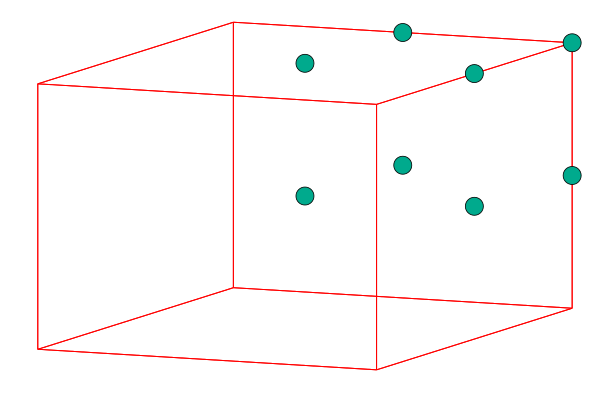

In [7]:
pos = 1ustrip(uconvert(u"pm", u0))
plot3d(BC)
scatter3d!(pos[1,:], pos[2,:], pos[3,:], label=nothing, markersize=10)

### Stage simulation

In [8]:
m = 1.0u"g/mol"
mass = m*ones(size(u0, 2))

T = 100u"K"

v0 = maxwell_boltzmann_velocity(size(u0,2), T, m)

simobj = MDSimulator.SimInfo(u0, v0, mass, [LJ], BC, true, 
    save_every = 10, thermo_save_every=10)

Simulation Parameters:
Units:
	energy:	kJ mol⁻¹
	force:	kJ pm⁻¹ mol⁻¹
	distance:	pm
	time:	fs
	velocity:	pm fs⁻¹
	acceleration:	pm fs⁻²
	mass:	g mol⁻¹
	temperature:	K
	density:	g pm⁻³ mol⁻¹

Boundary condition:
	 x-direction :	Periodic Boundary (Low: 0.0 High: 360.0 L: 360.0)

	 y-direction :	Periodic Boundary (Low: 0.0 High: 360.0 L: 360.0)

	 z-direction :	Periodic Boundary (Low: 0.0 High: 360.0 L: 360.0)

Output:
	Local (Per atom) save every:	10×Δτ
	thermo (system average) save every:	10×Δτ

Interactions:
1 PairPotential	→	

1.1 LennardJonesParameters:
V(r) = 4ϵ[(σ/r)ᵅ - (σ/r)ᵝ] where
↪ϵ():
Symmetric Matrix: 1x1
1.0	

↪σ():
Symmetric Matrix: 1x1
100.0	

↪R():
Symmetric Matrix: 1x1
1000.0	

↪exp1():
12.0
↪exp2():
6.0
↪equillibrium():
Symmetric Matrix: 1x1
112.2462048309373	

↪energy_shift():
Symmetric Matrix: 1x1
3.999996000000001e-6	

↪ids():
[1]

Others:
	Time step (Δτ): 1.0
	Max. neighbors: 100
	Reneighboring every: 100 steps



### Run simulation

In [9]:
steps = 1_00
ensemble = [NVE()]
callbacks = [cb_savethermo_f, cb_reneighboring_f]

function cal_te(v, x, params)
    n = fld(params.M.step, params.S.sim.thermo_save_every) + 1
    return 1ustrip(params.S.others.thermo_vals.ke[n] + params.S.others.thermo_vals.pe[n])
end

set_thermo(Symbol[:pe, :ke, :temp], output="dtab-delim", ckeys_=String["te"])

sol, parameters = MDSimulator.simulate(steps, simobj, ensemble; 
    verbose=true, callbacks = callbacks, cthermo=Dict("te"=>cal_te))

Cutoff for reneighboring is set to be 1100.0 pm.

Thermo output:
n		ke		pe		te		temp		
1		8.51121		-1.56293		6.94829		85.3053		
2		9.16858		-2.25392		6.91465		91.8939		
3		10.7211		-3.80596		6.91513		107.454		
4		10.2396		-3.35258		6.88699		102.628		
5		13.3846		-6.48136		6.90326		134.15		
6		14.1921		-7.27963		6.91249		142.243		
7		14.1251		-7.21146		6.9136		141.571		
8		14.8563		-7.95668		6.89962		148.9		
9		14.0647		-7.1476		6.91708		140.966		
10		15.4721		-8.55799		6.91415		155.073		
11		14.8338		-7.91847		6.91528		148.674		


(retcode: 	:Success
alg: 	OrdinaryDiffEq.VelocityVerlet()
, Abstract Simulation/MD Object:
	:S
	:M
)

Runs: 10


### Plot results

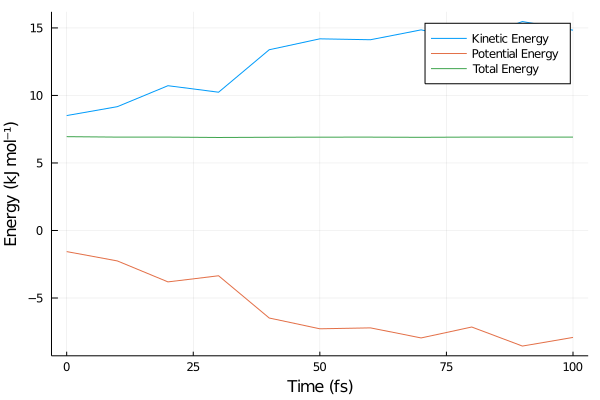

In [10]:
plot_energy(sol, parameters; steps=0)

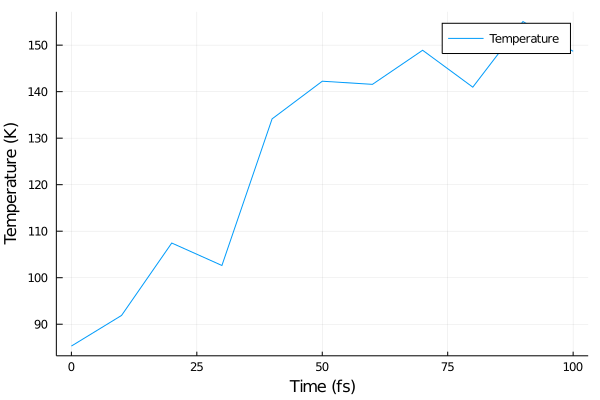

In [11]:
plot_temperature(sol, parameters, steps=0)

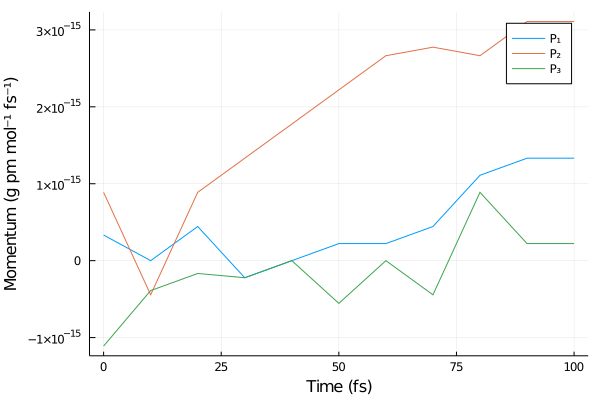

In [12]:
plot_momentum(sol, parameters)

### Save to disk

In [13]:
write_trajectory_xyz("./output/LJ", sol, parameters; overwrite=true)

Trajectory has been written.

## Part 2
- [x] Define a **Vanila version LNN** based simulation
    - [x] Feed forward DNN (use sigmoid)

### Create LNN 

In [14]:
using Random
using ForwardDiff
import Flux

function LNN(N; seed=-1)
    if seed!=-1
        Random.seed!(seed)
    end 
    m = Flux.Chain(
    Flux.Dense(6*N, 32, Flux.σ),
    Flux.Dense(32, 10, Flux.σ),
    Flux.Dense(10, 1)
    )
    MDSimulator.Lagrangian((v, u)->first(m(vcat(v..., u...))))
end

LNN (generic function with 1 method)

In [15]:
u00 = 1ustrip(u0)
v00 = 1ustrip(v0)

3×8 Array{Float64,2}:
 -0.193446  -0.546388  -0.0795759  …   0.0431768   -0.699055  -0.159979
  1.23324    0.390773  -1.35943       -0.00789162  -1.15494   -1.01691
 -0.426359  -0.324151  -0.391608      -1.29106      0.49528   -0.356071

In [16]:
𝐿 = LNN(n^3)
potential_energy(v00, u00, 𝐿)

-0.00301525f0

In [17]:
MDSimulator.acceleration(v00, u00, 𝐿)

3×8 Array{Float64,2}:
 -14980.4         1.35262e5  -2.11997e5  …      -3.11067e5    -2.37888e5
     -3.77843e5  -4.27017e5  -1.6043e5           4.64654e5    -1.22131e5
     -5.32452e5  -1.78348e5  -1.10366e5     -83997.6        2475.07

## Part 3 
- [ ] Optimise LNN parameters

### Load data

In [18]:
using DelimitedFiles
folder = "./output/LJ_ovito_files/"
files = readdir(folder)
data = []
for file in files
    if file[1:5]=="frame" && file!="frame_00001.data"
    data_ = readdlm(folder*file, skipstart=2)
    push!(data, ((data_[:,3:5]',data_[:,6:8]'), data_[:,9:11]'))
    end
end

In [19]:
loss_(v, u, acc) = mean(abs2.(MDSimulator.acceleration(1v, 1u, 𝐿) .- acc))

loss_ (generic function with 1 method)

In [20]:
function loss()
    s = 0.0
    for (X,Y) in data
        s += loss_(X[1], X[2], Y)
    end
    println("Loss: ", s)
    s/length(data)
end

loss (generic function with 1 method)

In [21]:
loss()

Loss: 1.6193751404511158e15


1.6193751404511156e14

In [27]:
ps = Flux.params(𝐿.𝐿)
using IterTools: ncycle


Params([])

In [26]:
opt = Flux.ADAGrad(10)
Flux.train!(loss, ps, ncycle([()], 1), opt)

Loss: 1.6193751404511158e15


LoadError: Mutating arrays is not supported

## Part 4
- [ ] Compare

In [24]:
loss()

Loss: 1.6193751404511158e15


1.6193751404511156e14